In [9]:
import sys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

from src.data.load_data import load_data

plt.style.use('ggplot')

df = load_data()

In [16]:
print(f"Shape of the Data: {df.shape}")
print(df.head())


Shape of the Data: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [15]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


# Feature Understanding
- Plotting feature distribution
    - Histogram
    - KDE
    - Boxplot

Text(0, 0.5, 'Count')

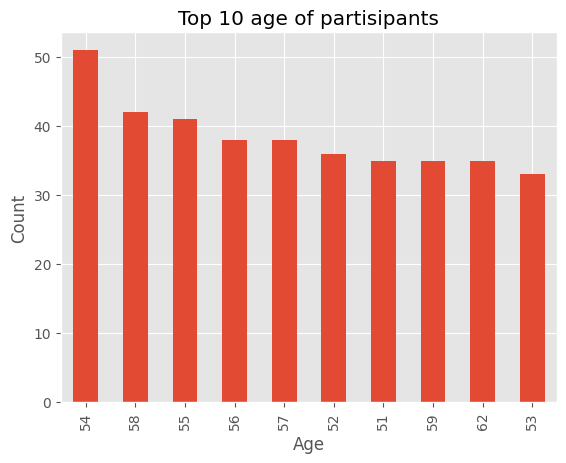

In [34]:
ax = df['Age'].value_counts() \
.head(10).plot(kind='bar', title='Top 10 age of partisipants')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(0, 0.5, 'Frequency')

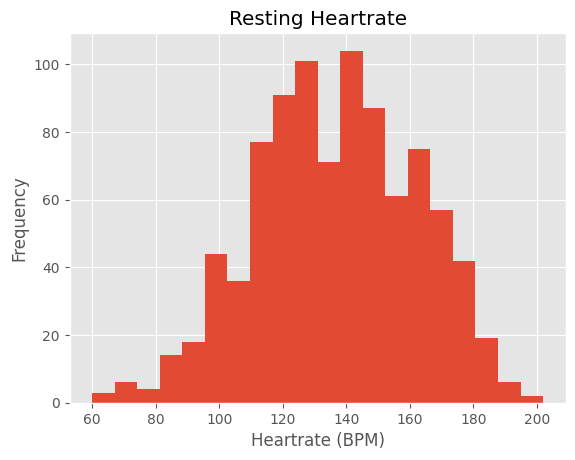

In [43]:
ax = df['MaxHR'].plot(kind='hist', bins=20, title='Resting Heartrate')

ax.set_xlabel('Heartrate (BPM)')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

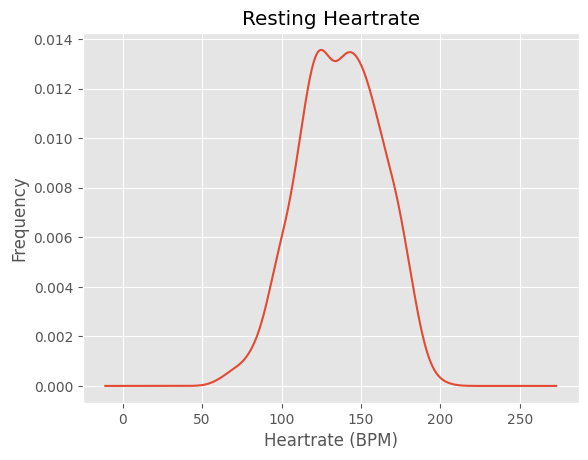

In [44]:
ax = df['MaxHR'].plot(kind='kde', title='Resting Heartrate')

ax.set_xlabel('Heartrate (BPM)')
ax.set_ylabel('Frequency')

# 2 Feature Relationships
* Scatterplot
* Heatmap Correlation
* Pairplot
* Group by comparison

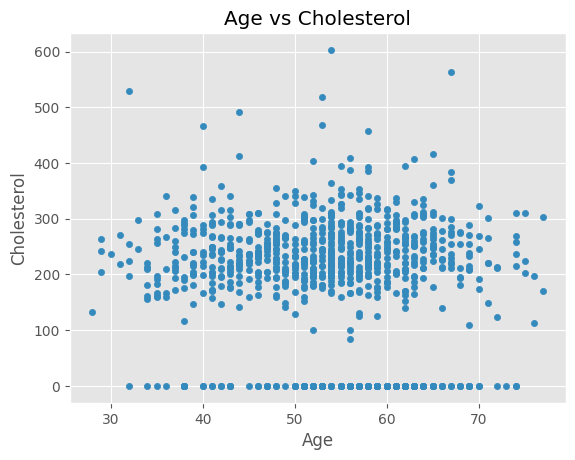

In [ ]:
df.plot(kind='scatter', 
        x='Age', 
        y='Cholesterol', 
        title='Age vs Cholesterol')
plt.show()

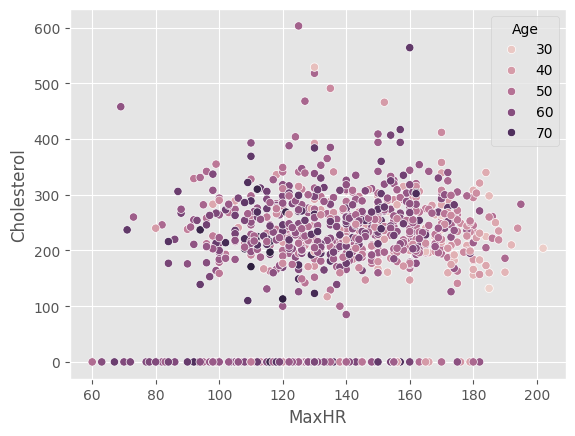

In [ ]:
sns.scatterplot(x='MaxHR', y='Cholesterol', hue='Age', data=df)
plt.show()

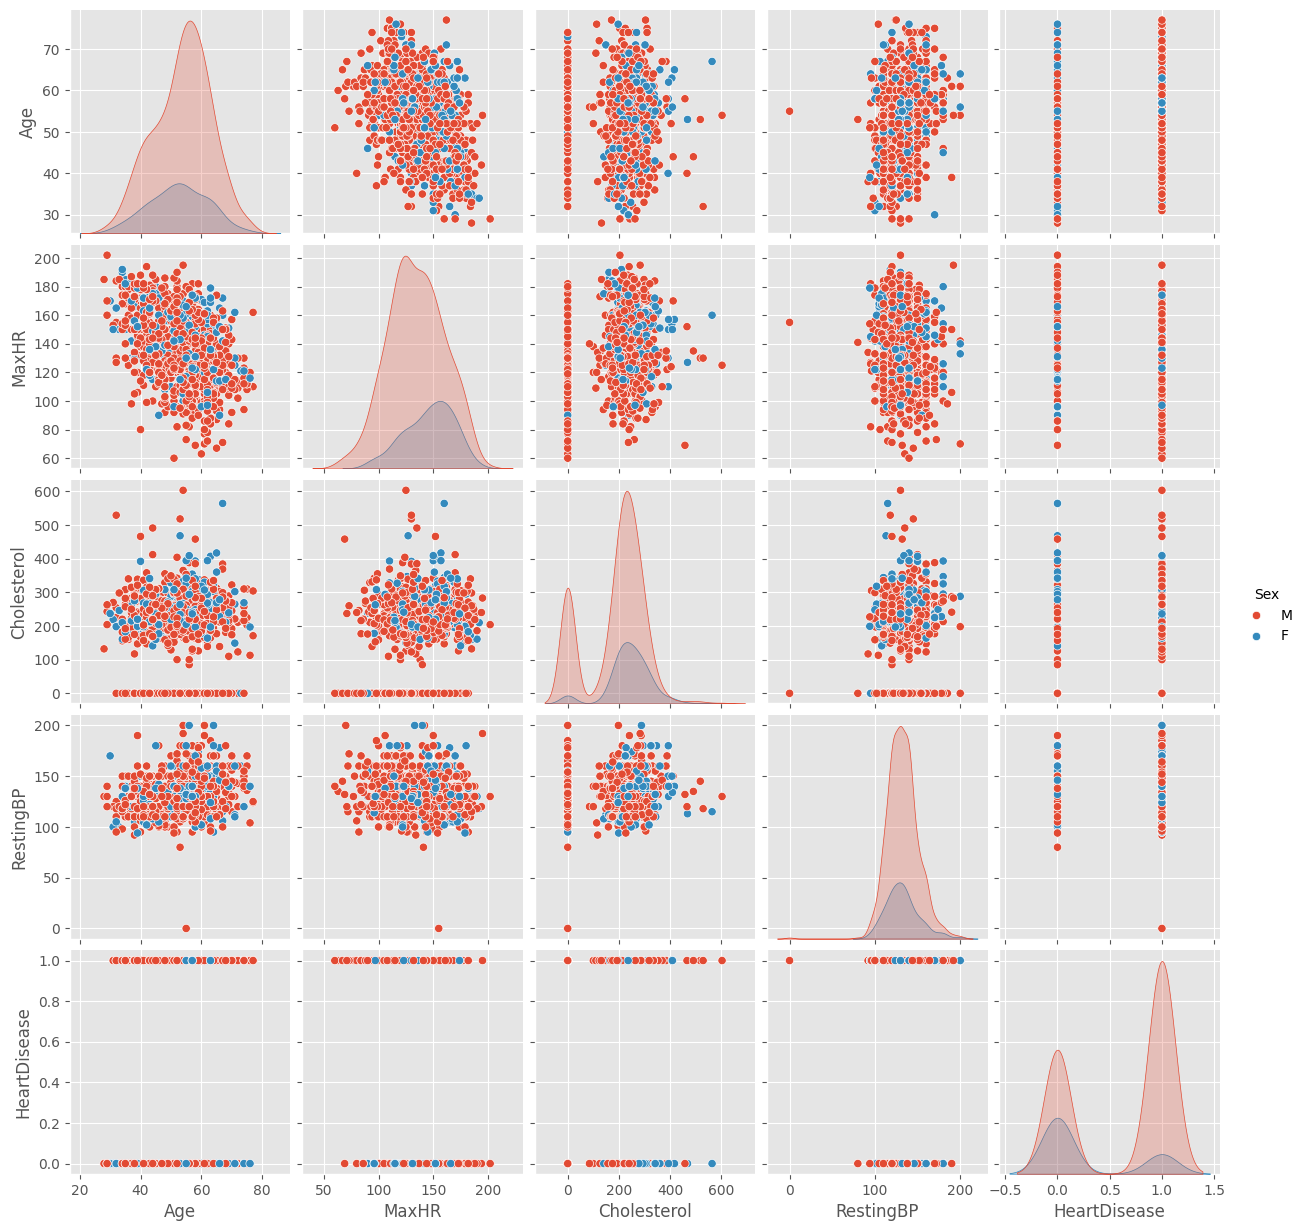

In [71]:
sns.pairplot(df, 
            vars=['Age', 'MaxHR', 'Cholesterol', 'RestingBP', 'HeartDisease'],
            hue='Sex')
plt.show()

In [72]:
df_corr = df[['Age', 'MaxHR', 'Cholesterol', 'RestingBP', 'HeartDisease']].corr()
df_corr

,Age,MaxHR,Cholesterol,RestingBP,HeartDisease
Age,1.000000,-0.382045,-0.095282,0.254399,0.282039
MaxHR,-0.382045,1.000000,0.235792,-0.112135,-0.400421
Cholesterol,-0.095282,0.235792,1.000000,0.100893,-0.232741
RestingBP,0.254399,-0.112135,0.100893,1.000000,0.107589
HeartDisease,0.282039,-0.400421,-0.232741,0.107589,1.000000


<Axes: >

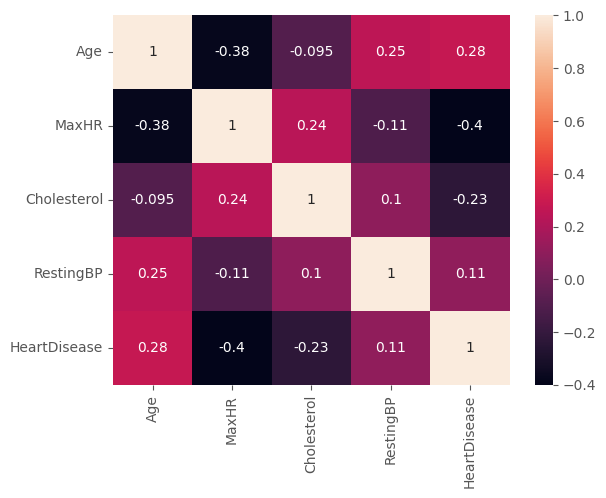

In [74]:
sns.heatmap(df_corr, annot=True)